----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

NASA ha realizado una serie de pruebas aerodinámicas y acústicas de secciones de cortes aerodinámicas bidimensionales y tridimensionales en el túnel de viento anecoico. 


El conjunto de datos de la NASA comprende diferentes tamaños de perfiles NACA 0012 a varias velocidades y ángulos de ataque en el túnel de viento. 

La envergadura del perfil y la posición del observador son las mismas en todos los experimentos.


Este problema tiene los siguientes atributos:
1. Frecuencia, en hercios.
2. Ángulo de ataque, en grados.
3. Longitud de cuerda, en metros.
4. Velocidad de la corriente libre, en metros por segundo.
5. Espesor de desplazamiento del lado de aspiración, en metros.

La única salida es:
6. Nivel de presión sonora escalado, en decibelios.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Importar las bibliotecas necesarias

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split 

import pickle

# from sklearn import linear_model
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor


Leer el dataSet

In [33]:
nasa_dataSet = pd.read_csv('nasaData.csv')
nasa_dataSet.head()
# cabeza

,Frequency,Attack_Angle,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement_Thickness,Scale_Sound_Presure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [34]:
nasa_dataSet.tail()
# cola

,Frequency,Attack_Angle,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement_Thickness,Scale_Sound_Presure_Level
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [35]:
nasa_dataSet.describe()
# descripcion
# 1. cantidad
# 2. media
# 3. estadistica
# 4. minimo
# 5. percentil 25%
# 6. percentil 50%
# 7. percentil 75%
# 8. maximo


,Frequency,Attack_Angle,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement_Thickness,Scale_Sound_Presure_Level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Tablas de las relaciones de cada atributo del DataSet entre ellos

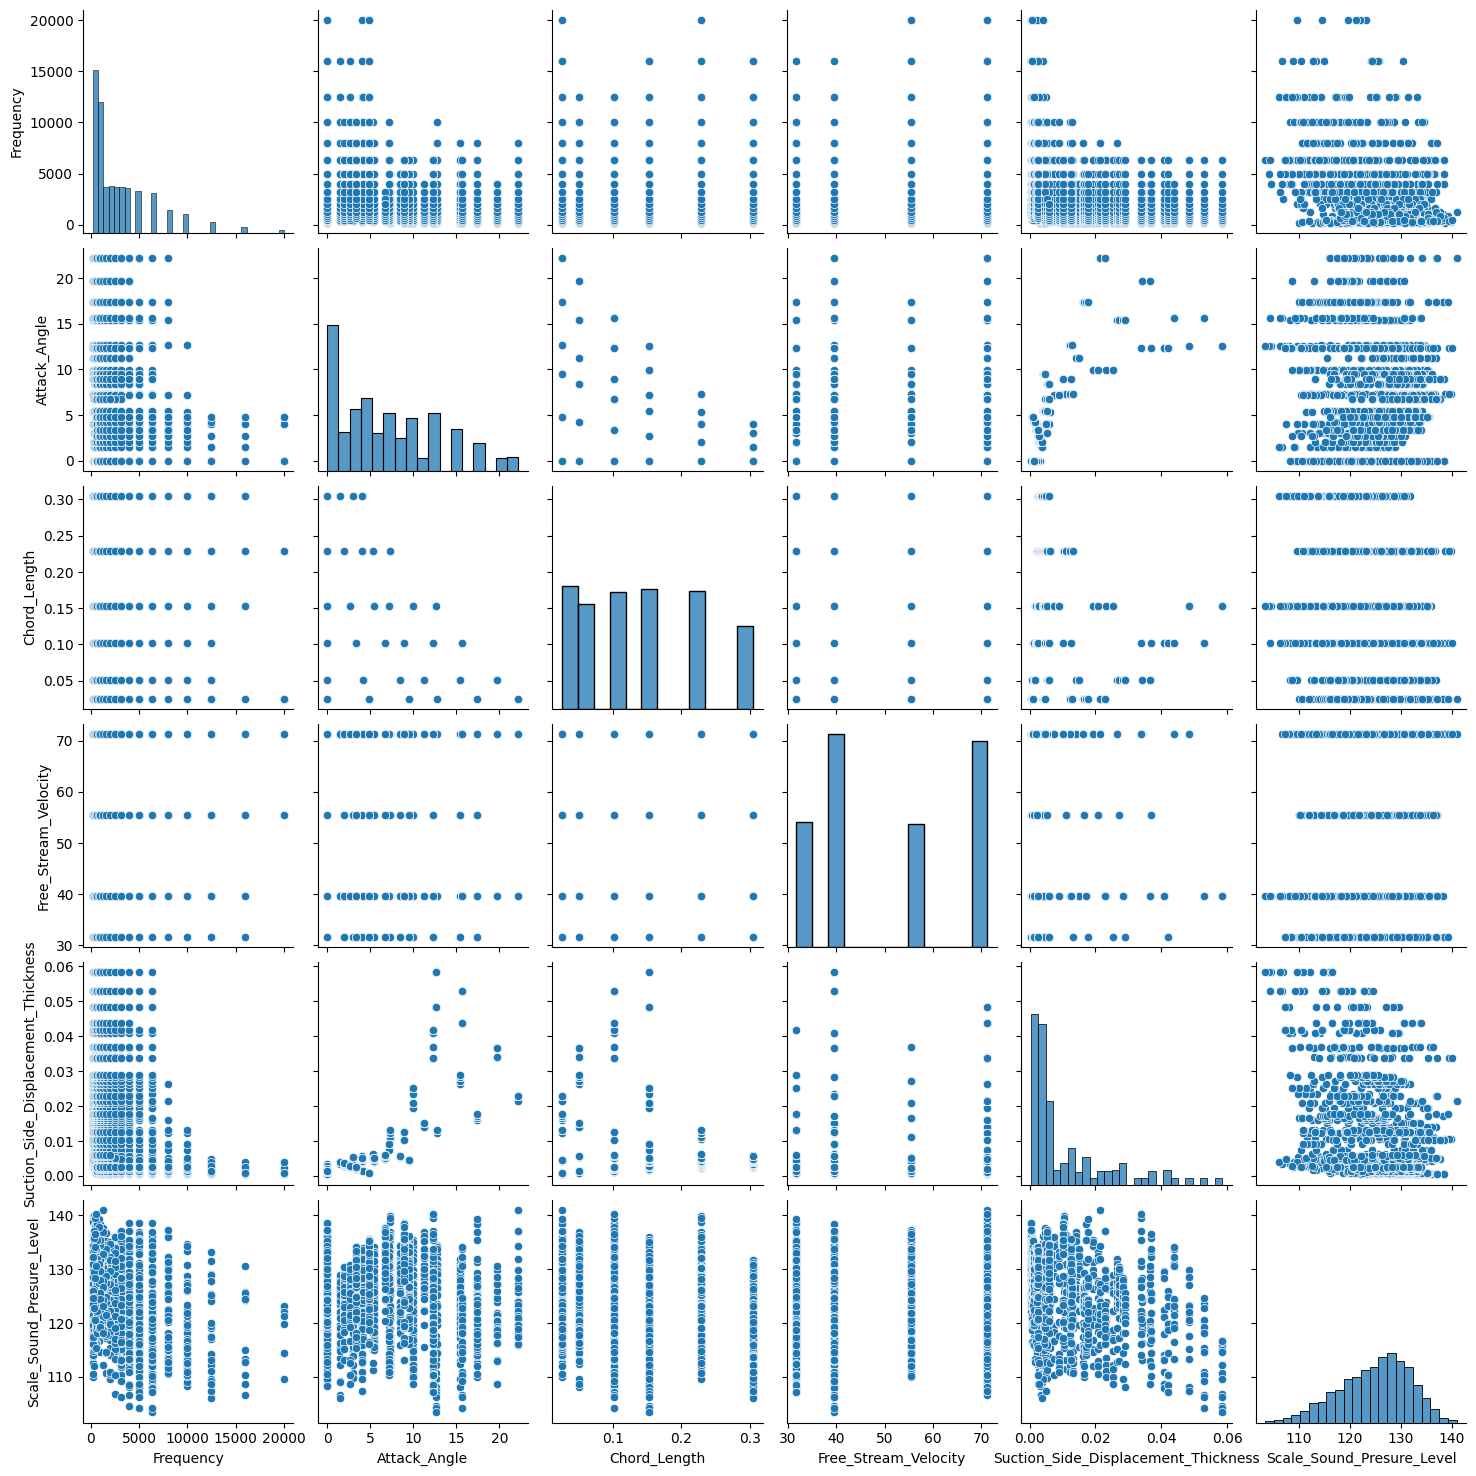

In [36]:
nasa_dataSet = nasa_dataSet.copy()
sns.pairplot(nasa_dataSet)

In [37]:
# nasa_dataSet['Chord_Length'].value_counts()

In [38]:
# nasa_dataSet['Free_Stream_Velocity'].value_counts()

Funcion para saber los valores de cada resultado del DataSet

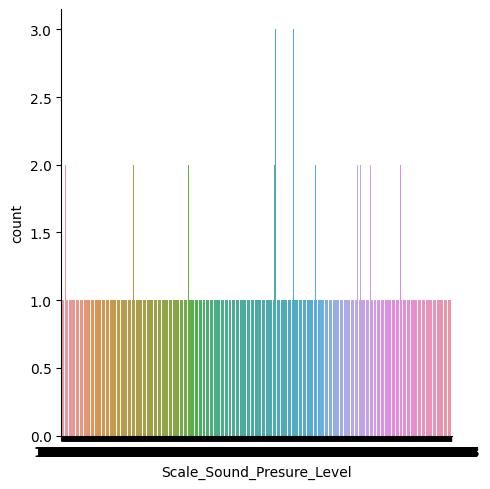

In [39]:
sns.catplot(x='Scale_Sound_Presure_Level',data=nasa_dataSet, kind='count')
# :(

Correlaciona las diferentes variables que existen en el DataSet y crea una imagen donde muestra los niveles de relacion

In [40]:
correlation = nasa_dataSet.corr()

<AxesSubplot: >

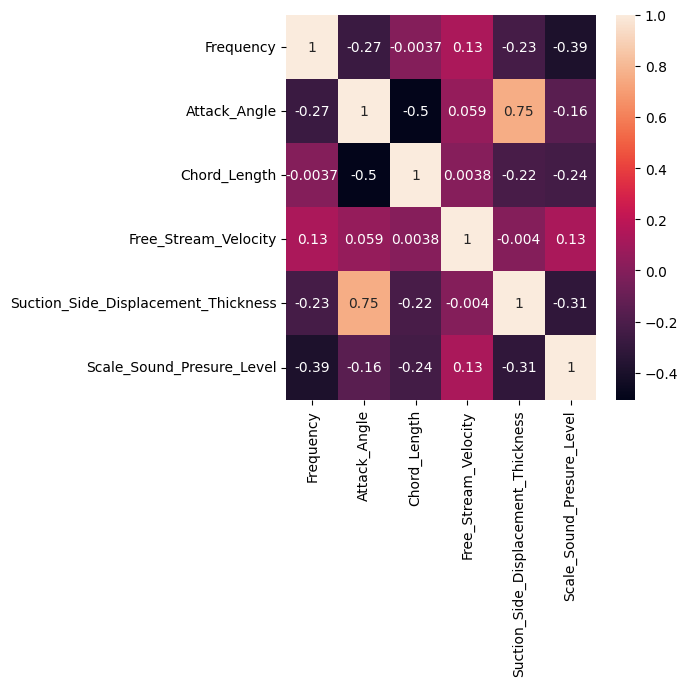

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True)

In [42]:
nasa_dataSet.shape
# forma

(1503, 6)

Ahora, separamos los datos en x (atributos), y (objetivo).

In [43]:
x = nasa_dataSet.drop(['Scale_Sound_Presure_Level'], axis=1)
y = nasa_dataSet['Scale_Sound_Presure_Level']
# print(x)
# print(y)

Antes de entrenar los datos en varios modelos de regresión, necesitamos dividir los datos en conjuntos de datos de entrenamiento y prueba. 

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


---------------------------------------------------------------------------

---------------------------------------------------------------------------> DESICION TREE REGRESSION <---------------------------------------------------------------------------

Entrenemos el modelo de regresión lineal usando el conjunto de datos de entrenamiento.

In [45]:
desTree = DecisionTreeRegressor(random_state=0)
desTree = desTree.fit(x_train, y_train)

Ahora, veamos qué tan bien se entrena el modelo para el conjunto de datos de prueba y entrenamiento. Para ello, haremos uso del error cuadrático medio, el error absoluto medio y la puntuación r2, es decir, el coeficiente de determinación.

In [46]:
y_pred = desTree.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_pred))
r2 = r2_score(y_train,y_pred)
mae = mean_squared_error(y_train,y_pred)

print("For Testing Dataset")
print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R2 Score: ", r2)

For Testing Dataset
Mean Absolute Error:  0.0
Root Mean Square Error:  0.0
R2 Score:  1.0


In [47]:
y_pred = desTree.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
mae = mean_squared_error(y_test,y_pred)

print("For Testing Dataset")
print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R2 Score: ", r2)

For Testing Dataset
Mean Absolute Error:  7.444933013289038
Root Mean Square Error:  2.7285404547649716
R2 Score:  0.8524588215996022


Ahora tracemos el gráfico de dispersión tomando los valores pronosticados en el eje y y los valores reales en el eje x para probar el conjunto de datos. Para cualquier par de valores pronosticados y reales, si los puntos correspondientes se encuentran en la línea de pendiente 1 que pasa por el origen, indica que los valores pronosticados son correctos. Esto significa que, a mayor desviación de la línea, mayor error en la predicción.

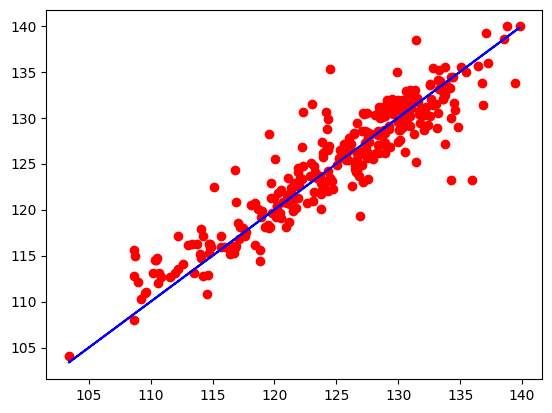

In [48]:
plt.scatter(y_test, y_pred, c='r')
plt.plot(y_test, y_test, c='blue')
plt.show()

Prueba del DataSet

In [49]:
input_data = (1000,0,0.3048,71.3,0.00266337)
input_data_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_numpy_array.reshape(1,-1)
prediction = desTree.predict(input_data_reshape)
print(prediction)

[125.201]


C:\Users\Gleisys\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


----------------------

Crea y guarda el archivo .sav para ejecutar la pagina web

In [50]:
filename = 'airfoil.sav'
pickle.dump(desTree, open(filename, 'wb'))

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.score(x_test,y_test) * 100

85.24588215996022

In [52]:
# nasa_dataSet['SuctionSideDdisplacementThickness'].value_counts()